✅ Đã xuất file log: ../data/udk_moodle_log_course_42.csv
✅ Đã xuất file điểm: ../data/udk_moodle_grades_course_42.csv
Số dòng log: 19375 | Số dòng điểm: 902

📊 Thống kê điểm trong khóa học 42:
count    902.000000
mean       1.076497
std        3.949420
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        0.000000
max       10.000000
Name: finalgrade, dtype: float64


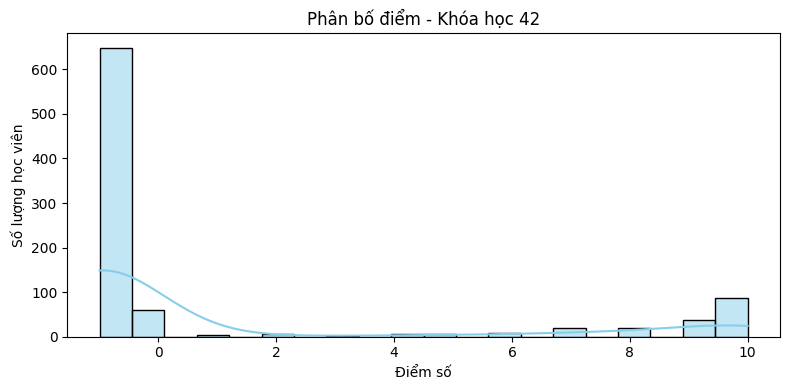


📈 5 dòng đầu tiên của log:
           id         timecreated                           eventname  \
3285  9212923 2022-09-05 07:25:12           \core\event\course_viewed   
3290  9212928 2022-09-05 07:25:42           \core\event\course_viewed   
3472  9213711 2022-09-05 10:23:15           \core\event\course_viewed   
3473  9213712 2022-09-05 10:23:18           \core\event\course_viewed   
3474  9213735 2022-09-05 10:25:39  \core\event\course_section_updated   

       action          target  userid  courseid                other  
3285   viewed          course       3        42                 None  
3290   viewed          course       3        42                 None  
3472   viewed          course       3        42                 None  
3473   viewed          course       3        42                 None  
3474  updated  course_section       3        42  {'sectionnum': '*'}  


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# === 1. Đọc file CSV gốc ===
df_log = pd.read_csv("../data/udk_moodle_log.csv")
df_grade = pd.read_csv("../data/udk_moodle_all_grades.csv")

# === 2. Làm sạch dữ liệu cơ bản ===
df_log['timecreated'] = pd.to_datetime(df_log['timecreated'], unit='s', errors='coerce')
df_log['other'] = df_log['other'].apply(lambda x: json.loads(x) if isinstance(x, str) and x != 'null' else None)

# === 3. Loại bỏ các dòng webservice_function_called ===
df_filtered_log = df_log[df_log['eventname'] != '\\core\\event\\webservice_function_called']

# === 4. Chỉ lấy dữ liệu khóa học 42 ===
course_id = 42
df_course_42 = df_filtered_log[df_filtered_log['courseid'] == course_id].copy()
df_grade_42 = df_grade[df_grade['courseid'] == course_id].copy()

# === 5. Xuất file CSV riêng cho khóa học 42 ===
output_log_path = f"../data/udk_moodle_log_course_{course_id}.csv"
output_grade_path = f"../data/udk_moodle_grades_course_{course_id}.csv"

df_course_42.to_csv(output_log_path, index=False)
df_grade_42.to_csv(output_grade_path, index=False)

# === 6. Phân tích điểm ===
print(f"✅ Đã xuất file log: {output_log_path}")
print(f"✅ Đã xuất file điểm: {output_grade_path}")
print(f"Số dòng log: {len(df_course_42)} | Số dòng điểm: {len(df_grade_42)}")

if not df_grade_42.empty:
    print("\n📊 Thống kê điểm trong khóa học 42:")
    print(df_grade_42['finalgrade'].describe())

    # --- Biểu đồ phân bố điểm ---
    plt.figure(figsize=(8, 4))
    sns.histplot(df_grade_42['finalgrade'], bins=20, kde=True, color='skyblue')
    plt.title(f'Phân bố điểm - Khóa học {course_id}')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng học viên')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không tìm thấy dữ liệu điểm cho khóa học này.")

# === 7. (Tùy chọn) Xem nhanh hoạt động log ===
print("\n📈 5 dòng đầu tiên của log:")
print(df_course_42.head())

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# === 1. Đọc file CSV gốc ===
df_log = pd.read_csv("../data/udk_moodle_log.csv")
df_grade = pd.read_csv("../data/udk_moodle_all_grades.csv")

# === 2. Làm sạch dữ liệu cơ bản ===
df_log['timecreated'] = pd.to_datetime(df_log['timecreated'], unit='s', errors='coerce')
df_log['other'] = df_log['other'].apply(lambda x: json.loads(x) if isinstance(x, str) and x != 'null' else None)

# === 3. Loại bỏ các dòng webservice_function_called ===
df_filtered_log = df_log[df_log['eventname'] != '\\core\\event\\webservice_function_called']

# === 4. Chỉ lấy dữ liệu khóa học 42 ===
course_id = 42
df_course_42 = df_filtered_log[df_filtered_log['courseid'] == course_id].copy()
df_grade_42 = df_grade[df_grade['courseid'] == course_id].copy()

# === 5. Xuất file CSV riêng cho khóa học 42 ===
output_log_path = f"../data/udk_moodle_log_course_{course_id}.csv"
output_grade_path = f"../data/udk_moodle_grades_course_{course_id}.csv"

df_course_42.to_csv(output_log_path, index=False)
df_grade_42.to_csv(output_grade_path, index=False)

# === 6. Phân tích điểm ===
print(f"✅ Đã xuất file log: {output_log_path}")
print(f"✅ Đã xuất file điểm: {output_grade_path}")
print(f"Số dòng log: {len(df_course_42)} | Số dòng điểm: {len(df_grade_42)}")

if not df_grade_42.empty:
    print("\n📊 Thống kê điểm trong khóa học 42:")
    print(df_grade_42['finalgrade'].describe())

    # --- Biểu đồ phân bố điểm ---
    plt.figure(figsize=(8, 4))
    sns.histplot(df_grade_42['finalgrade'], bins=20, kde=True, color='skyblue')
    plt.title(f'Phân bố điểm - Khóa học {course_id}')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng học viên')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không tìm thấy dữ liệu điểm cho khóa học này.")

# === 7. (Tùy chọn) Xem nhanh hoạt động log ===
print("\n📈 5 dòng đầu tiên của log:")
print(df_course_42.head())

✅ Đã xuất file log: ../data/udk_moodle_log_course_670.csv
✅ Đã xuất file điểm: ../data/udk_moodle_grades_course_670.csv
Số dòng log: 13995 | Số dòng điểm: 233

📊 Thống kê điểm trong khóa học 670:
count    233.000000
mean       7.635193
std        2.947816
min       -1.000000
25%        7.000000
50%        9.000000
75%       10.000000
max       10.000000
Name: finalgrade, dtype: float64


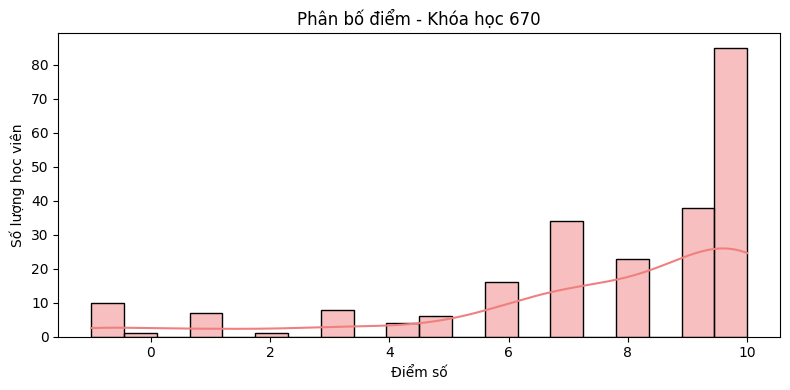


📈 5 dòng đầu tiên của log:
           id         timecreated  \
2415  9206091 2022-09-03 13:04:58   
2416  9206092 2022-09-03 13:04:59   
2417  9206093 2022-09-03 13:05:36   
2418  9206094 2022-09-03 13:05:36   
2419  9206095 2022-09-03 13:05:36   

                                              eventname    action  \
2415             \mod_assign\event\course_module_viewed    viewed   
2416           \mod_assign\event\submission_form_viewed    viewed   
2417             \mod_assign\event\course_module_viewed    viewed   
2418  \assignsubmission_onlinetext\event\assessable_...  uploaded   
2419  \assignsubmission_onlinetext\event\submission_...   created   

               target  userid  courseid  \
2415    course_module    8670       670   
2416  submission_form    8670       670   
2417    course_module    8670       670   
2418       assessable    8670       670   
2419       submission    8670       670   

                                                  other  
2415             

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# === 1. Đọc file CSV gốc ===
df_log = pd.read_csv("../data/udk_moodle_log.csv")
df_grade = pd.read_csv("../data/udk_moodle_all_grades.csv")

# === 2. Làm sạch dữ liệu cơ bản ===
df_log['timecreated'] = pd.to_datetime(df_log['timecreated'], unit='s', errors='coerce')
df_log['other'] = df_log['other'].apply(lambda x: json.loads(x) if isinstance(x, str) and x != 'null' else None)

# === 3. Loại bỏ các dòng webservice_function_called ===
df_filtered_log = df_log[df_log['eventname'] != '\\core\\event\\webservice_function_called']

# === 4. Chỉ lấy dữ liệu khóa học 670 ===
course_id = 670
df_course = df_filtered_log[df_filtered_log['courseid'] == course_id].copy()
df_grade_course = df_grade[df_grade['courseid'] == course_id].copy()

# === 5. Xuất file CSV riêng cho khóa học 670 ===
output_log_path = f"../data/udk_moodle_log_course_{course_id}.csv"
output_grade_path = f"../data/udk_moodle_grades_course_{course_id}.csv"

df_course.to_csv(output_log_path, index=False)
df_grade_course.to_csv(output_grade_path, index=False)

# === 6. Phân tích điểm ===
print(f"✅ Đã xuất file log: {output_log_path}")
print(f"✅ Đã xuất file điểm: {output_grade_path}")
print(f"Số dòng log: {len(df_course)} | Số dòng điểm: {len(df_grade_course)}")

if not df_grade_course.empty:
    print(f"\n📊 Thống kê điểm trong khóa học {course_id}:")
    print(df_grade_course['finalgrade'].describe())

    # --- Biểu đồ phân bố điểm ---
    plt.figure(figsize=(8, 4))
    sns.histplot(df_grade_course['finalgrade'], bins=20, kde=True, color='lightcoral')
    plt.title(f'Phân bố điểm - Khóa học {course_id}')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng học viên')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Không tìm thấy dữ liệu điểm cho khóa học này.")

# === 7. (Tùy chọn) Xem nhanh log ===
print("\n📈 5 dòng đầu tiên của log:")
print(df_course.head())